# Data loading and preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv", index_col='id')
test = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv")

train.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [3]:
train.shape, test.shape

((188533, 12), (125690, 12))

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 

(None, None)

In [5]:
train.isnull().sum(), test.isnull().sum()

(brand               0
 model               0
 model_year          0
 milage              0
 fuel_type        5083
 engine              0
 transmission        0
 ext_col             0
 int_col             0
 accident         2452
 clean_title     21419
 price               0
 dtype: int64,
 id                  0
 brand               0
 model               0
 model_year          0
 milage              0
 fuel_type        3383
 engine              0
 transmission        0
 ext_col             0
 int_col             0
 accident         1632
 clean_title     14239
 dtype: int64)

In [6]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [7]:
train.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


In [8]:
def count_unique_features(df, column_name):
    """
    Count and display unique values in a specific column of a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the column.
    column_name (str): The column name for which to count unique values.

    Returns:
    pd.Series: A series with unique values and their counts.
    """
    if column_name in df.columns:
        unique_counts = df[column_name].value_counts()
        print(f"Unique values in column '{column_name}':\n")
        print(unique_counts)
        return unique_counts
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return None


In [9]:
a = count_unique_features(train, 'brand')

Unique values in column 'brand':

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren          

In [10]:
train['clean_title'].unique(), test['clean_title'].unique()

(array(['Yes', nan], dtype=object), array(['Yes', nan], dtype=object))

In [11]:
train['accident'].unique(), test['accident'].unique()

(array(['None reported', 'At least 1 accident or damage reported', nan],
       dtype=object),
 array(['None reported', 'At least 1 accident or damage reported', nan],
       dtype=object))

In [12]:
train['fuel_type'].unique(), test['fuel_type'].unique()

(array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
        'Plug-In Hybrid', '–', 'not supported'], dtype=object),
 array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
        'Plug-In Hybrid', '–', 'not supported'], dtype=object))

# Data Preprocessing

In [13]:
train['fuel_type'] = train['fuel_type'].replace('–',np.nan)
test['fuel_type'] = test['fuel_type'].replace('–',np.nan)

In [14]:
train['fuel_type'].unique(), test['fuel_type'].unique()

(array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
        'Plug-In Hybrid', 'not supported'], dtype=object),
 array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
        'Plug-In Hybrid', 'not supported'], dtype=object))

In [15]:
len(train[train['accident'].isna() & train['clean_title'].isna()])

2438

In [16]:
len(train[train['accident'].isna() & train['fuel_type'].isna()])

86

In [17]:
def replace_nan_with_mode(df, column_name):
    """
    Replace NaN values in a specific column of the dataframe with the mode.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column where NaN values should be replaced.

    Returns:
    None: The function modifies the dataframe in place.
    """
    mode_value = df[column_name].mode().max()
    df[column_name] = df[column_name].fillna(mode_value)

In [18]:
replace_nan_with_mode(train,'clean_title')
replace_nan_with_mode(train,'accident')
replace_nan_with_mode(train,'fuel_type')

In [19]:
replace_nan_with_mode(test,'clean_title')
replace_nan_with_mode(test,'accident')
replace_nan_with_mode(test,'fuel_type')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_and_visualize_outliers(df, cat_threshold=2):
    """
    Function to detect outliers in both numerical and categorical columns, visualize them,
    and return the outliers for each column.
    
    Parameters:
    df (DataFrame): The input dataframe containing both numerical and categorical columns.
    cat_threshold (int): The threshold for detecting rare categories (outliers) in categorical columns.
                         Categories with a frequency less than this threshold will be considered outliers.
    
    Returns:
    dict: A dictionary containing the outliers for each column.
    """
    
    outliers_dict = {}

    # Detect outliers in numerical columns using IQR method
    def detect_numerical_outliers(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return column[(column < lower_bound) | (column > upper_bound)]
    
    # Detect outliers in categorical columns based on frequency threshold
    def detect_categorical_outliers(column):
        freq = column.value_counts()
        return column[column.isin(freq[freq < cat_threshold].index)]
    
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Plot outliers for numerical columns using boxplot
    for col in numerical_columns:
        outliers = detect_numerical_outliers(df[col])
        outliers_dict[col] = outliers  # Store the detected outliers

        # Visualization
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'Numerical Column: {col} - Outliers')
        plt.show()
        
        if not outliers.empty:
            print(f'Outliers detected in {col}:')
            print(outliers)
        else:
            print(f'No outliers detected in {col}')
    
    # Plot outliers for categorical columns using barplot
    for col in categorical_columns:
        outliers = detect_categorical_outliers(df[col])
        outliers_dict[col] = outliers  # Store the detected outliers

        if not outliers.empty:
            plt.figure(figsize=(10, 5))
            outlier_counts = outliers.value_counts()
            sns.barplot(x=outlier_counts.index, y=outlier_counts.values)
            plt.title(f'Categorical Column: {col} - Outliers')
            plt.ylabel('Frequency')
            plt.show()
            
            print(f'Outliers detected in {col}:')
            print(outliers.unique())
        else:
            print(f'No outliers detected in {col}')
    
    return outliers_dict

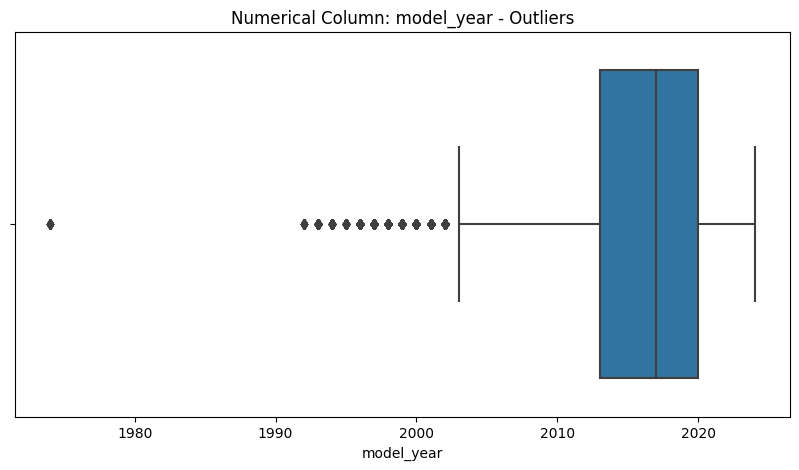

Outliers detected in model_year:
id
1         2002
2         2002
59        2001
81        2000
88        2002
          ... 
188464    2002
188475    2000
188477    2000
188479    2002
188527    1999
Name: model_year, Length: 5132, dtype: int64


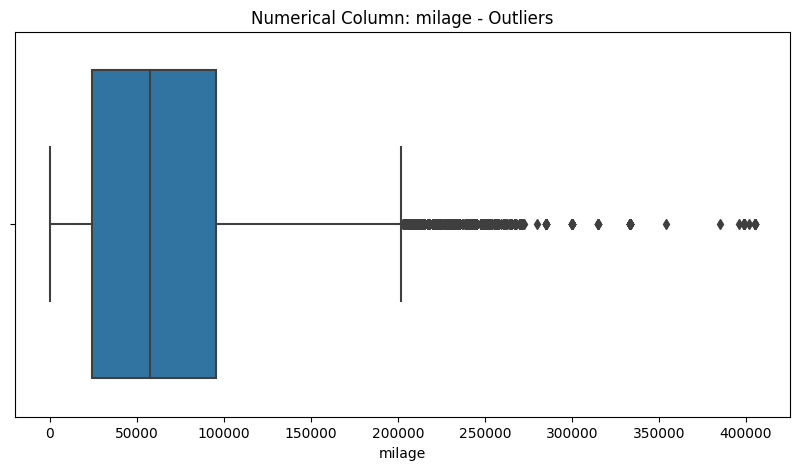

Outliers detected in milage:
id
0         213000
10        212500
28        244200
195       269885
424       215000
           ...  
187708    245000
188047    249083
188092    205000
188160    220000
188523    239000
Name: milage, Length: 1766, dtype: int64


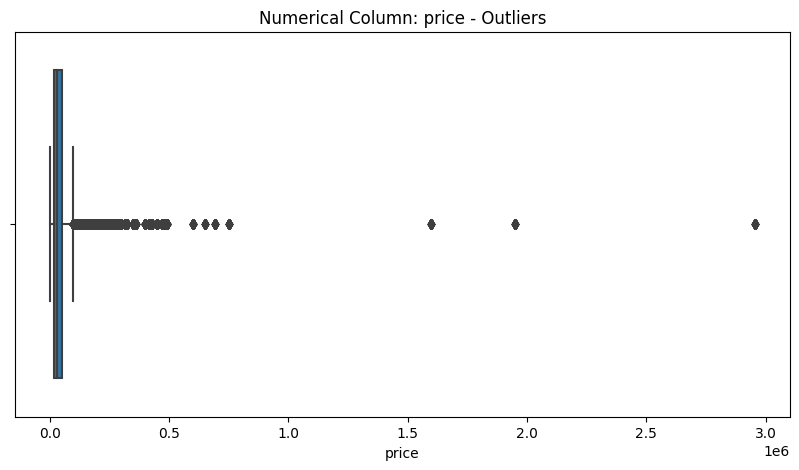

Outliers detected in price:
id
31        104900
36        165000
43        244896
44        145000
65        193063
           ...  
188463    199991
188469    149900
188476    267950
188485    115000
188501    129000
Name: price, Length: 10880, dtype: int64
No outliers detected in brand


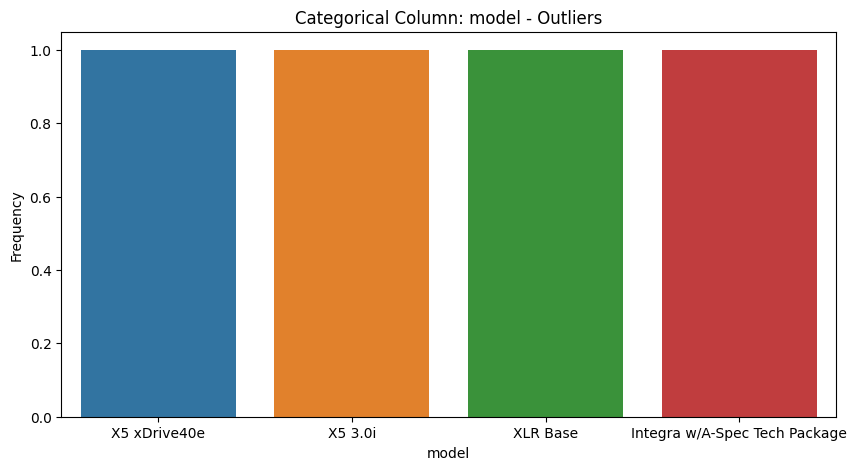

Outliers detected in model:
['X5 xDrive40e' 'X5 3.0i' 'XLR Base' 'Integra w/A-Spec Tech Package']
No outliers detected in fuel_type


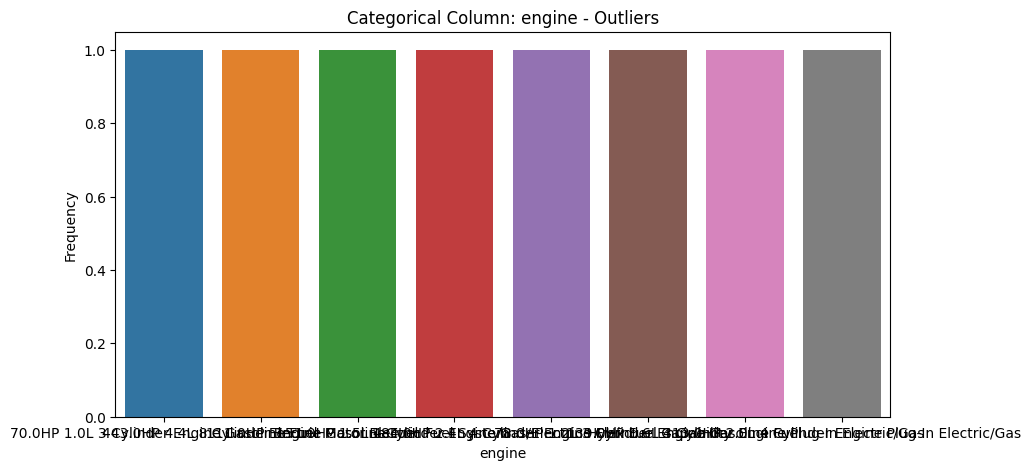

Outliers detected in engine:
['70.0HP 1.0L 3 Cylinder Engine Gasoline Fuel'
 '443.0HP 4.4L 8 Cylinder Engine Gasoline Fuel'
 '111.0HP Electric Motor Electric Fuel System'
 '151.0HP 1.5L 4 Cylinder Engine Gas/Electric Hybrid'
 '184.0HP 2.4L 4 Cylinder Engine Flex Fuel Capability'
 '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel'
 '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas'
 '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas']
No outliers detected in transmission
No outliers detected in ext_col
No outliers detected in int_col
No outliers detected in accident
No outliers detected in clean_title


In [21]:
outliers = detect_and_visualize_outliers(train)

In [22]:
def filter_outliers(df, column_name, threshold, condition='below'):
    """
    Function to filter out rows in a DataFrame based on a specified condition and threshold.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    column_name (str): The name of the column to check for outliers.
    threshold (int or float): The threshold for filtering.
    condition (str): The condition for filtering ('below' or 'above'). Default is 'below'.

    Returns:
    DataFrame: A new DataFrame with rows removed based on the specified condition.
    int: The number of outliers removed.
    """
    if column_name in df.columns:
        if condition == 'below':
            outliers = df[df[column_name] < threshold]
            df_filtered = df[df[column_name] >= threshold]
        elif condition == 'above':
            outliers = df[df[column_name] > threshold]
            df_filtered = df[df[column_name] <= threshold]
        else:
            raise ValueError("Condition must be 'below' or 'above'")
        
        count = len(outliers)
        return df_filtered, count
    else:
        print(f"'{column_name}' column not found in DataFrame")
        return df, 0

In [23]:
df_filtered_below, removed_count_below = filter_outliers(train, 'model_year', 1990, condition='below')
removed_count_below

12

In [24]:
df_filtered_below, removed_count_below = filter_outliers(train, 'milage',275000 , condition='above')
removed_count_below

85

In [25]:
df_filtered_below, removed_count_below = filter_outliers(train, 'price',500000 , condition='above')
removed_count_below

352

In [26]:
# Extract outlier values
# milage_outliers = outliers['milage']
# price_outliers = outliers['price']
# model_year_outliers = outliers['model_year']
model_outliers = outliers['model']
engine_outliers = outliers['engine']

# Filter the DataFrame to remove rows with outliers
filtered_df = df_filtered_below[
    ~df_filtered_below['model'].isin(model_outliers) &
    ~df_filtered_below['engine'].isin(engine_outliers) 
#     &
#     ~df_filtered_below['milage'].isin(milage_outliers) &
#     ~df_filtered_below['price'].isin(price_outliers) &
#     ~df_filtered_below['model_year'].isin(model_year_outliers)
]

In [27]:
train = filtered_df

In [28]:
# one hot encording only

# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# import category_encoders as ce
# import numpy as np

# def encode_categorical_features(X_train, X_test):
#     """
#     Encodes categorical features using One-Hot Encoding (for low cardinality features) 
    
#     Args:
#     - X_train (pd.DataFrame): Training data.
#     - X_test (pd.DataFrame): Test data.
    
#     Returns:
#     - X_train_encoded (pd.DataFrame): Encoded training data.
#     - X_test_encoded (pd.DataFrame): Encoded test data.
#     """
#     # Initialize encoders
#     ohe = OneHotEncoder(sparse_output=False, dtype=np.float32, handle_unknown='ignore')  # 32-bit precision

#     # Find categorical columns
#     categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
    
#     X_train_encoded = X_train.copy()
#     X_test_encoded = X_test.copy()

#     for col in categorical_cols:
        
#         X_train_ohe = ohe.fit_transform(X_train[[col]])
#         X_test_ohe = ohe.transform(X_test[[col]])

#         # Convert to DataFrame and rename columns
#         ohe_cols = [f"{col}_{cat}" for cat in ohe.categories_[0]]
#         X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
#         X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)

#         # Concatenate back to the original dataset
#         X_train_encoded = pd.concat([X_train_encoded, X_train_ohe], axis=1)
#         X_test_encoded = pd.concat([X_test_encoded, X_test_ohe], axis=1)

#         # Drop the original column
#         X_train_encoded.drop(columns=[col], inplace=True)
#         X_test_encoded.drop(columns=[col], inplace=True)

       

#     return X_train_encoded, X_test_encoded




In [29]:
# one hot and target encording



import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import numpy as np

def encode_categorical_features(X_train, X_test, y_train, cardinality_threshold=10):
    """
    Encodes categorical features using One-Hot Encoding (for low cardinality features) 
    and Target Encoding (for high cardinality features).
    
    Args:
    - X_train (pd.DataFrame): Training data.
    - X_test (pd.DataFrame): Test data.
    - y_train (pd.Series): Target values for training data.
    - cardinality_threshold (int): Threshold for unique values to decide between One-Hot and Target Encoding.
    
    Returns:
    - X_train_encoded (pd.DataFrame): Encoded training data.
    - X_test_encoded (pd.DataFrame): Encoded test data.
    """
    # Initialize encoders
    ohe = OneHotEncoder(sparse_output=False, dtype=np.float32, handle_unknown='ignore')  # 32-bit precision
    target_encoder = ce.TargetEncoder(cols=None)  # Target encoding for high-cardinality features

    # Find categorical columns
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
    
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    for col in categorical_cols:
        num_unique_values = X_train[col].nunique()

        if num_unique_values <= cardinality_threshold:
            # Apply One-Hot Encoding if the number of unique values is low
            X_train_ohe = ohe.fit_transform(X_train[[col]])
            X_test_ohe = ohe.transform(X_test[[col]])

            # Convert to DataFrame and rename columns
            ohe_cols = [f"{col}_{cat}" for cat in ohe.categories_[0]]
            X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_cols, index=X_train.index)
            X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_cols, index=X_test.index)

            # Concatenate back to the original dataset
            X_train_encoded = pd.concat([X_train_encoded, X_train_ohe], axis=1)
            X_test_encoded = pd.concat([X_test_encoded, X_test_ohe], axis=1)

            # Drop the original column
            X_train_encoded.drop(columns=[col], inplace=True)
            X_test_encoded.drop(columns=[col], inplace=True)

        else:
            # Apply Target Encoding if the number of unique values is high
            target_encoder.cols = [col]
            X_train_encoded[col] = target_encoder.fit_transform(X_train[col], y_train)
            X_test_encoded[col] = target_encoder.transform(X_test[col])

    return X_train_encoded, X_test_encoded




In [30]:
# Example usage
train, test = encode_categorical_features(train, test, train['price'], cardinality_threshold=15)

In [31]:
# Example usage
# train, test = encode_categorical_features(train, test)

In [32]:
train.isnull().sum()

brand                                              0
model                                              0
model_year                                         0
milage                                             0
engine                                             0
transmission                                       0
ext_col                                            0
int_col                                            0
price                                              0
fuel_type_Diesel                                   0
fuel_type_E85 Flex Fuel                            0
fuel_type_Gasoline                                 0
fuel_type_Hybrid                                   0
fuel_type_Plug-In Hybrid                           0
fuel_type_not supported                            0
accident_At least 1 accident or damage reported    0
accident_None reported                             0
clean_title_Yes                                    0
dtype: int64

In [33]:
test.isnull().sum()

id                                                 0
brand                                              0
model                                              0
model_year                                         0
milage                                             0
engine                                             0
transmission                                       0
ext_col                                            0
int_col                                            0
fuel_type_Diesel                                   0
fuel_type_E85 Flex Fuel                            0
fuel_type_Gasoline                                 0
fuel_type_Hybrid                                   0
fuel_type_Plug-In Hybrid                           0
fuel_type_not supported                            0
accident_At least 1 accident or damage reported    0
accident_None reported                             0
clean_title_Yes                                    0
dtype: int64

# Model building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [35]:
X = train.drop('price',axis=1)
y = train['price']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# import xgboost as xgb

# model = xgb.XGBRegressor(eval_metric='rmse')
# model.fit(X_train,y_train)

In [38]:
# import lightgbm as lgb

# # Define the LightGBM model with RMSE as the evaluation metric
# lgb_model = lgb.LGBMRegressor(objective='regression', metric='rmse')

# # Fit the model
# lgb_model.fit(X_train, y_train)


In [39]:
# from catboost import CatBoostRegressor

# # Define the CatBoost model with RMSE as the loss function
# cat_model = CatBoostRegressor(loss_function='RMSE', verbose=0)

# # Fit the model
# cat_model.fit(X_train, y_train)


In [40]:
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # XGBoost Predictions
# xgb_pred = model.predict(X_test)
# xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

# # LightGBM Predictions
# lgb_pred = lgb_model.predict(X_test)
# lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))

# # CatBoost Predictions
# cat_pred = cat_model.predict(X_test)
# cat_rmse = np.sqrt(mean_squared_error(y_test, cat_pred))

# # Show RMSE for all models
# print(f"XGBoost RMSE: {xgb_rmse:.2f}")
# print(f"LightGBM RMSE: {lgb_rmse:.2f}")
# print(f"CatBoost RMSE: {cat_rmse:.2f}")



In [41]:
# XGBoost RMSE: 70376.06
# LightGBM RMSE: 67812.76
# CatBoost RMSE: 68476.48

In [42]:
# import optuna
# import lightgbm as lgb
# from sklearn.model_selection import cross_val_score

# # Define the objective function for Optuna
# def objective(trial):
#     # Suggest hyperparameters
#     params = {
#         'objective': 'regression',
#         'metric': 'rmse',
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 150),
#         'max_depth': trial.suggest_int('max_depth', 3, 12),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
#         'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
#         'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
#         'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 10.0),
#         'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 10.0),
#         'device_type': 'gpu'
#     }

#     # Initialize the LightGBM model with suggested parameters
#     lgb_model = lgb.LGBMRegressor(**params)

#     # Perform 5-fold cross-validation (you can adjust the number of folds)
#     cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
#     # Compute the average RMSE across all folds
#     rmse = np.sqrt(-cv_scores.mean())
    
#     return rmse

# # Run the Optuna optimization
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters
# print(f"Best hyperparameters: {study.best_params}")
# print(f"Best RMSE: {study.best_value:.2f}")


In [43]:
# best_lgb_params = study.best_params

In [44]:
best_lgb_params = {'learning_rate': 0.03591987267524337, 'num_leaves': 111, 'max_depth': 8, 'min_child_samples': 55, 'feature_fraction': 0.5157255582786685, 'bagging_fraction': 0.9701739475315172, 'bagging_freq': 1, 'lambda_l1': 4.211012328172116, 'lambda_l2': 9.202439137047019, 'device_type': 'gpu', 'objective': 'regression',
        'metric': 'rmse'}

In [45]:
import lightgbm as lgb

# Define the LightGBM model with RMSE as the evaluation metric
lgb_model = lgb.LGBMRegressor(**best_lgb_params)

# Fit the model
lgb_model.fit(X_train, y_train)


[LightGBM] [Warning] feature_fraction is set=0.5157255582786685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5157255582786685
[LightGBM] [Warning] lambda_l2 is set=9.202439137047019, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.202439137047019
[LightGBM] [Warning] lambda_l1 is set=4.211012328172116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.211012328172116
[LightGBM] [Warning] bagging_fraction is set=0.9701739475315172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9701739475315172
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.5157255582786685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5157255582786685
[LightGBM] [Warning] lambda_l2 is set=9.202439137047019, reg_lambda=0.0 will be ignored. Curre

1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 8 dense feature groups (1.15 MB) transferred to GPU in 0.002331 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 41574.564194
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor(bagging_fraction=0.9701739475315172, bagging_freq=1,
              device_type='gpu', feature_fraction=0.5157255582786685,
              lambda_l1=4.211012328172116, lambda_l2=9.202439137047019,
              learning_rate=0.03591987267524337, max_depth=8, metric='rmse',
              min_child_samples=55, num_leaves=111, objective='regression')

In [46]:
# LightGBM Predictions
lgb_pred = lgb_model.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))

lgb_rmse

[LightGBM] [Warning] feature_fraction is set=0.5157255582786685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5157255582786685
[LightGBM] [Warning] lambda_l2 is set=9.202439137047019, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.202439137047019
[LightGBM] [Warning] lambda_l1 is set=4.211012328172116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.211012328172116
[LightGBM] [Warning] bagging_fraction is set=0.9701739475315172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9701739475315172
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


34674.560067038714

# Prediction and Submission

In [47]:
X = test.drop('id',axis=1)

# Step 1: Extract test IDs
test_ids = test['id']

# Making predictions on test data
y_test_pred = lgb_model.predict(X)

# Step 4: Create a DataFrame with test IDs and predictions
submission = pd.DataFrame({
    'id': test_ids,
    'class': y_test_pred
})

# Step 5: Save the submission file
submission.to_csv('sample_submission.csv', index=False)

# Display the first few rows of the submission file
submission.head()


[LightGBM] [Warning] feature_fraction is set=0.5157255582786685, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5157255582786685
[LightGBM] [Warning] lambda_l2 is set=9.202439137047019, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.202439137047019
[LightGBM] [Warning] lambda_l1 is set=4.211012328172116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.211012328172116
[LightGBM] [Warning] bagging_fraction is set=0.9701739475315172, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9701739475315172
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


,id,class
0,188533,18445.477487
1,188534,78137.704828
2,188535,55532.330060
3,188536,29935.442171
4,188537,30383.314395


In [48]:
import os

# Create the .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Upload your kaggle.json file to the notebook
# Then move it to the correct location
!mv /kaggle/input/my-api-key/kaggle.json /root/.kaggle/kaggle.json

# Set the correct permissions
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot remove '/kaggle/input/my-api-key/kaggle.json': Read-only file system


In [49]:
# Path to your submission file
submission_file_path = '/kaggle/working/sample_submission.csv'

# Kaggle competition details
competition_name = 'playground-series-s4e9'  # Update with your competition name

# Submit the file using Kaggle CLI
!kaggle competitions submit -c {competition_name} -f {submission_file_path} -m "best submission"

100%|██████████████████████████████████████| 3.04M/3.04M [00:00<00:00, 7.25MB/s]
Successfully submitted to Regression of Used Car Prices